### This is a simple example for DCA parameter calculation by Scipy optimization method

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [33]:
def DCAfunc(time, qi, b, Di):
    return qi/(1+b*Di*time)**(1/b)

In [34]:
df=pd.read_csv('DCA_input.csv')
df.head()

,Months,Rate
0,1,798.95
1,2,818.13
2,3,650.40
3,4,454.44
4,5,563.06


In [25]:
# Fit for the parameters of the DCA function:
para_opt, pcov = curve_fit(DCAfunc, df.Months, df.Rate)
print('DCA hypobolic parameters are: qi=%3.1f, b=%1.2f, Di=%1.2f' %(para_opt[0], para_opt[1], para_opt[2]))

DCA hypobolic parameters are: qi=1215.5, b=1.98, Di=0.51


In [28]:
newtime = np.arange(25, 49)
pred = DCAfunc(newtime, para_opt[0], para_opt[1], para_opt[2])

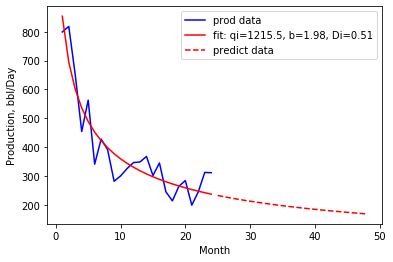

In [31]:
plt.figure()
# raw prod data
plt.plot(df.Months, df.Rate, 'b-', label='prod data')
# data from curve fitting
plt.plot(df.Months, DCAfunc(df.Months, *para_opt), 'r-', label='fit: qi=%3.1f, b=%1.2f, Di=%1.2f' % tuple(para_opt))
# data from prediction
plt.plot(newtime, pred, 'r--', label='predict data')
plt.xlabel("Month")
plt.ylabel("Production, bbl/Day")
plt.legend()
plt.show()

### Here initial production qi has the different (larger) value compared with true production data

### so we can put a boundary for the parameter fitting:

In [36]:
para_opt, pcov = curve_fit(DCAfunc, df.Months, df.Rate, bounds=(0, [max(df.Rate), 2, 1]))
print('DCA hypobolic parameters are: qi=%3.1f, b=%1.2f, Di=%1.2f' %(para_opt[0], para_opt[1], para_opt[2]))

DCA hypobolic parameters are: qi=818.1, b=1.32, Di=0.14


In [54]:
y = DCAfunc(df.Months, *para_opt)
print('First three months production: ')
print(y[0:3])

First three months production: 
0    720.319826
1    645.940128
2    587.239486
Name: Months, dtype: float64


### It shows qi is much smaller than the real prod data. And all these differnce (larger/smaller) are caused by the hyperbolic equation we use. So choose hyperbolic parameters only based on your judgement.

### Now let see how the curve goes:

In [52]:
newtime = np.arange(25, 49)
pred = DCAfunc(newtime, para_opt[0], para_opt[1], para_opt[2])

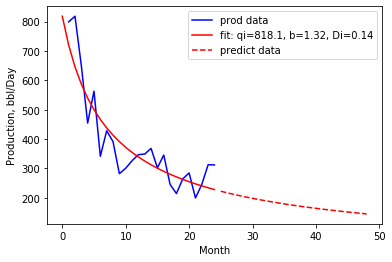

In [53]:
newtime = np.arange(25, 49)
pred = DCAfunc(newtime, para_opt[0], para_opt[1], para_opt[2])
plt.figure()
# raw prod data
plt.plot(df.Months, df.Rate, 'b-', label='prod data')
# data from curve fitting
plt.plot(np.append(0,[df.Months]), np.append(para_opt[0], DCAfunc(df.Months, *para_opt)), 'r-', label='fit: qi=%3.1f, b=%1.2f, Di=%1.2f' % tuple(para_opt))
# data from prediction
plt.plot(newtime, pred, 'r--', label='predict data')
plt.xlabel("Month")
plt.ylabel("Production, bbl/Day")
plt.legend()
plt.show()